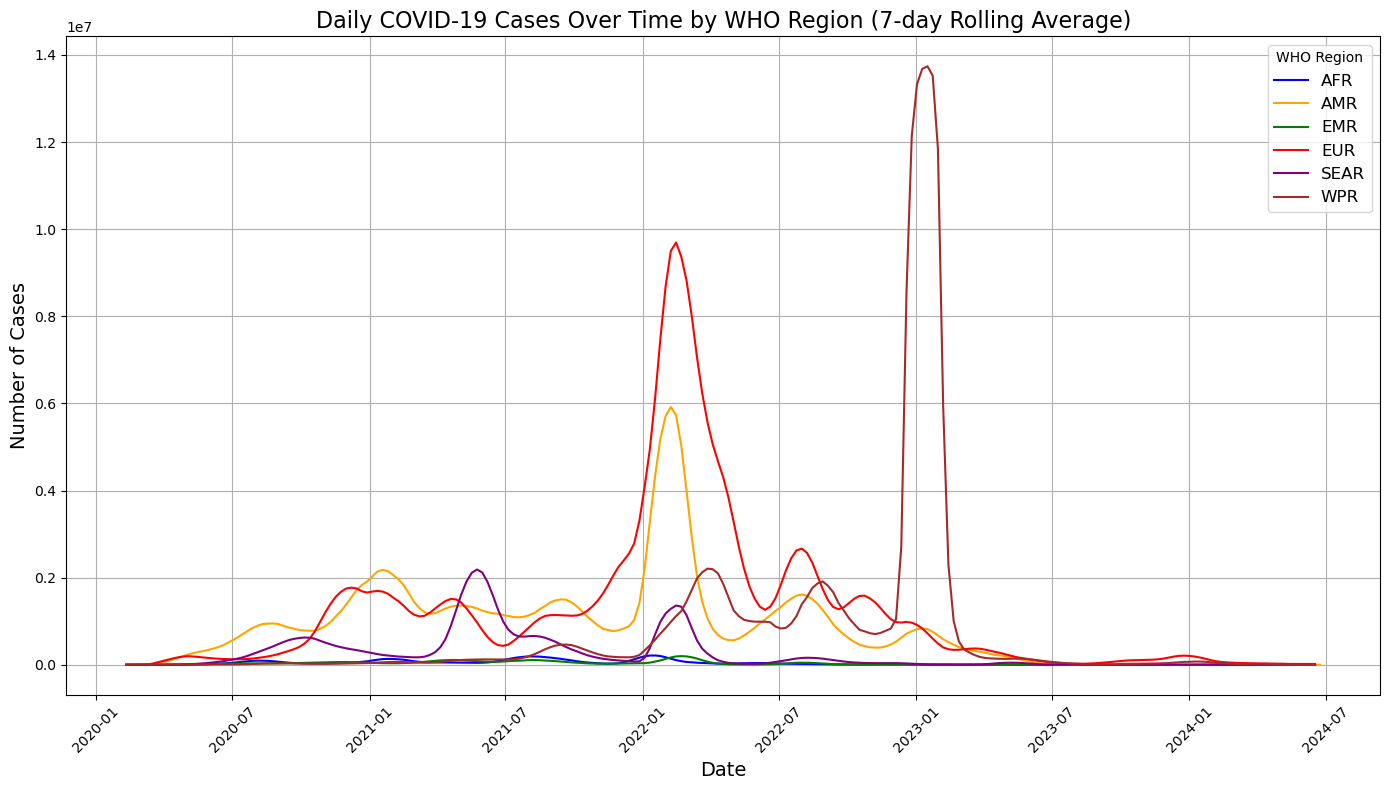

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\tadak\OneDrive\Desktop\Data analysis\work\Challenge\Project\project\case_death_test_dataset.csv"
data = pd.read_csv(file_path)
# Convert the ISO_START_DATE column to datetime format
data['ISO_START_DATE'] = pd.to_datetime(data['ISO_START_DATE'])

# Group by date and WHO region, and sum the cases to get the daily cases for each region
daily_cases_region = data.groupby(['ISO_START_DATE', 'WHO_REGION'])['DAILY_CASES'].sum().reset_index()

# Pivot the data to have regions as columns
pivot_daily_cases_region = daily_cases_region.pivot(index='ISO_START_DATE', columns='WHO_REGION', values='DAILY_CASES')

# Calculate the rolling mean for smoothing the curves (7-day window)
pivot_daily_cases_region = pivot_daily_cases_region.rolling(window=7).mean()

# Plot the trend of daily cases over time for different WHO regions
plt.figure(figsize=(14, 8))

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i, region in enumerate(pivot_daily_cases_region.columns):
    plt.plot(pivot_daily_cases_region.index, pivot_daily_cases_region[region], label=region, color=colors[i % len(colors)])

plt.title('Daily COVID-19 Cases Over Time by WHO Region (7-day Rolling Average)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.legend(title='WHO Region', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


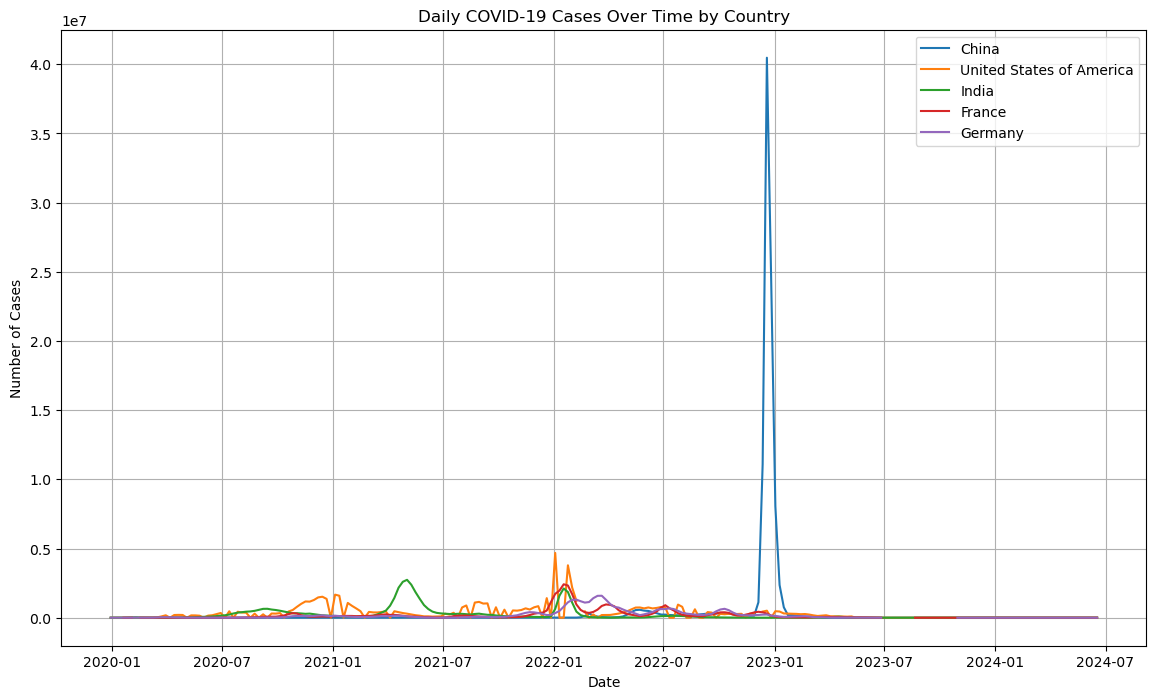

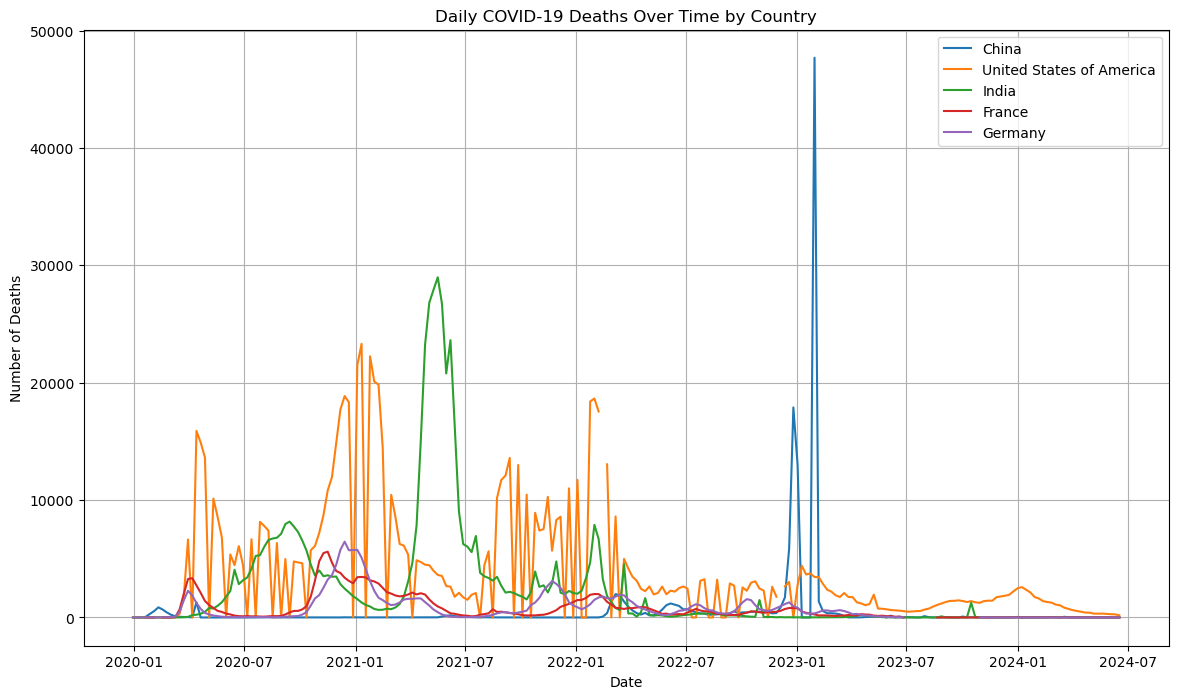

In [12]:
# Select a few countries for comparison
countries_to_compare = ['China', 'United States of America', 'India', 'France', 'Germany']

# Filter the data for the selected countries
filtered_data = data[data['COUNTRY_NAME'].isin(countries_to_compare)]

# Group by date and country, and sum the cases to get the daily cases for each country
daily_cases_countries = filtered_data.groupby(['ISO_START_DATE', 'COUNTRY_NAME'])['DAILY_CASES'].sum().reset_index()

# Pivot the data to have countries as columns for cases
pivot_daily_cases = daily_cases_countries.pivot(index='ISO_START_DATE', columns='COUNTRY_NAME', values='DAILY_CASES')

# Group by date and country, and sum the deaths to get the daily deaths for each country
daily_deaths_countries = filtered_data.groupby(['ISO_START_DATE', 'COUNTRY_NAME'])['DAILY_CASES_DEATHS'].sum().reset_index()

# Pivot the data to have countries as columns for deaths
pivot_daily_deaths = daily_deaths_countries.pivot(index='ISO_START_DATE', columns='COUNTRY_NAME', values='DAILY_CASES_DEATHS')

# Plot the trend of daily cases over time for the selected countries
plt.figure(figsize=(14, 8))

for country in countries_to_compare:
    plt.plot(pivot_daily_cases.index, pivot_daily_cases[country], label=country)

plt.title('Daily COVID-19 Cases Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

# Plot the trend of daily deaths over time for the selected countries
plt.figure(figsize=(14, 8))

for country in countries_to_compare:
    plt.plot(pivot_daily_deaths.index, pivot_daily_deaths[country], label=country)

plt.title('Daily COVID-19 Deaths Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()



In [13]:
# Group by country and sum the deaths
total_deaths_per_country = data.groupby('COUNTRY_NAME')['DAILY_CASES_DEATHS'].sum().reset_index()
# Sort the countries by total deaths in descending order and select the top five
top_five_countries_deaths = total_deaths_per_country.sort_values(by='DAILY_CASES_DEATHS', ascending=False).head(5)
print(top_five_countries_deaths)



                 COUNTRY_NAME  DAILY_CASES_DEATHS
230  United States of America            907430.0
36                     Brazil            702116.0
110                     India            533621.0
182        Russian Federation            403072.0
150                    Mexico            335011.0


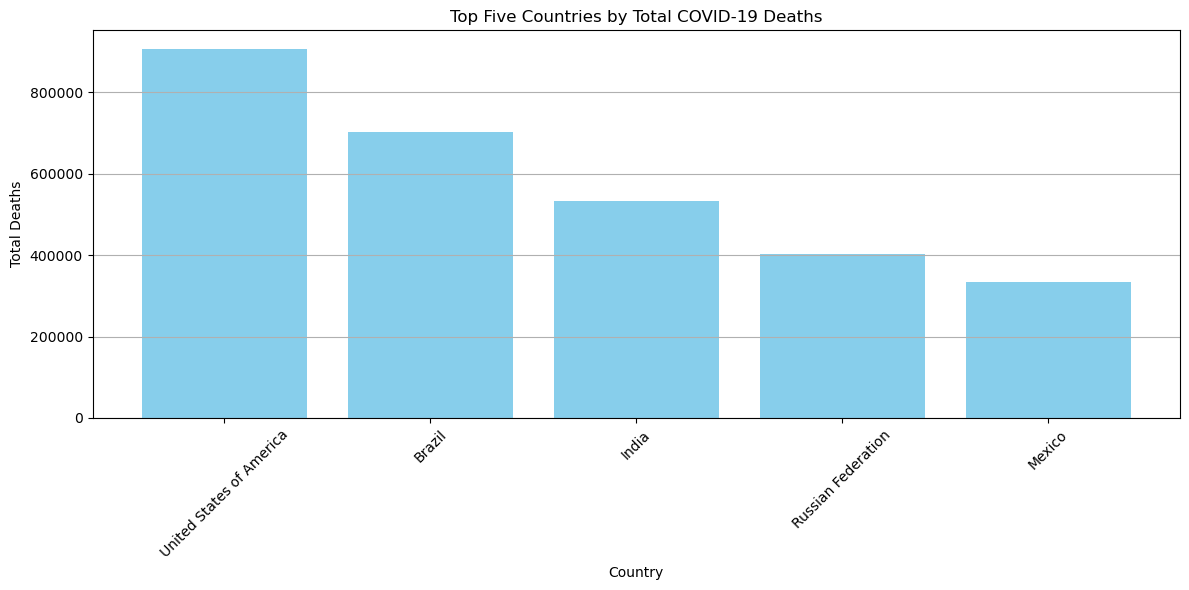

In [14]:
# Create a bar graph for the top five countries with the highest total COVID-19 deaths
plt.figure(figsize=(12, 6))
plt.bar(top_five_countries_deaths['COUNTRY_NAME'], top_five_countries_deaths['DAILY_CASES_DEATHS'], color='skyblue')
plt.title('Top Five Countries by Total COVID-19 Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [17]:
# Summarize total cases by country
total_cases_by_country = daily_trends.groupby('COUNTRY_NAME')['DAILY_CASES'].sum().reset_index()

# Sort by total cases in descending order and get the top five countries
top_five_countries = total_cases_by_country.sort_values(by='DAILY_CASES', ascending=False).head(5)

# Print the top five countries with the highest number of cases
print(top_five_countries)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_five_countries['COUNTRY_NAME'], top_five_countries['DAILY_CASES'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total COVID-19 Cases')
plt.title('Top 5 Countries with the Highest Number of COVID-19 Cases')
plt.xticks(rotation=45)
plt.show()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_five_countries['DAILY_CASES'], labels=top_five_countries['COUNTRY_NAME'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries with the Highest Number of COVID-19 Cases')
plt.show()

NameError: name 'daily_trends' is not defined

In [16]:
# generating one row  
rows = data.sample(frac =.25) 
  
# checking if sample is 0.25 times data or not 
  
if (0.25*(len(data))== len(rows)): 
    print( "Cool") 
    print(len(data), len(rows)) 
  
# display 
rows 

,WHO_REGION,COUNTRY_NAME,COUNTRY_CODE,ISO_YEAR,ISO_WEEK,ISO_START_DATE,SEX,AGEGROUP,AGEGROUP_NUM,DAILY_CASES,...,DETAILED_CASES_DEATHS_HW,DETAILED_CASES_DISCHARGED,PERSONS_TESTED,PERSONS_TESTED_PCR,DAILY_DS,DETAILED_CASES_DS,DETAILED_CASES_DEATHS_DS,DETAILED_CASES_HW_DS,DETAILED_CASES_HOSPITALISED_DS,TEST_DS
306379,EUR,Netherlands,NLD,2022,12,2022-03-21,All,<5,9,NaN,...,NaN,NaN,NaN,NaN,NaN,WEEKLY_V2,WEEKLY_V2,WEEKLY_V2,WEEKLY_V2,NaN
601113,EUR,Croatia,HRV,2023,32,2023-08-07,Female,15-19,43,NaN,...,NaN,NaN,NaN,NaN,NaN,WEEKLY_V2,WEEKLY_V2,WEEKLY_V2,WEEKLY_V2,NaN
6875,AMR,Ecuador,ECU,2020,13,2020-03-23,Female,70-74,113,NaN,...,NaN,NaN,NaN,NaN,NaN,CRF,CRF,CRF,CRF,NaN
270396,AMR,Bahamas,BHS,2021,40,2021-10-04,Male,35-39,82,NaN,...,0.0,NaN,NaN,NaN,NaN,CRF,CRF,CRF,CRF,NaN
2645,AFR,Namibia,NAM,2020,33,2020-08-10,Male,60-64,103,NaN,...,NaN,NaN,NaN,NaN,NaN,CRF,CRF,CRF,CRF,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99524,EUR,Kosovo,XKX,2020,28,2020-07-06,Female,50-59,96,NaN,...,NaN,NaN,NaN,NaN,NaN,WEEKLY_V2,WEEKLY_V2,WEEKLY_V2,WEEKLY_V2,NaN
216337,EUR,Iceland,ISL,2021,41,2021-10-11,Male,65-69,107,NaN,...,NaN,NaN,NaN,NaN,NaN,WEEKLY_V2,WEEKLY_V2,WEEKLY_V2,WEEKLY_V2,NaN
481801,EUR,Ukraine,UKR,2022,51,2022-12-19,Female,60-64,103,NaN,...,NaN,NaN,NaN,NaN,NaN,WEEKLY_V2,WEEKLY_V2,WEEKLY_V2,WEEKLY_V2,NaN
687953,EUR,UKRAINE,UKR,2024,19,2024-05-06,All,<5,9,NaN,...,NaN,NaN,NaN,NaN,NaN,WEEKLY_V2,WEEKLY_V2,NaN,WEEKLY_V2,NaN
